# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. Нужно изучить рынок российского кинопроката и выявить текущие тренды, уделить внимание фильмам, которые получили государственную поддержку. 

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Предобработка данных

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math as mt
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:,.2f}'.format)

mkrf_movies = pd.read_csv('mkrf_movies.csv')
mkrf_shows = pd.read_csv('mkrf_shows.csv')

mkrf_movies.info()
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В первой таблице есть 15 столбцов, 7486 строк, во многих есть пропуски. Есть 2 типа данных: `object`, `float`. Во 2 таблице всего 2 столбца и 3158 строк, типы данных: `int`, `float`.

У 2 таблиц есть общий столбец - `puNumber`, но он имеет разные типы данных. Необходимо привести к `int`.

In [57]:
mkrf_movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

Также есть не числовое значение "нет" в 1797 строке, то привести столбец к `int` нельзя. Также это значение нечем заменить, поэтому эту строку можно удалить.

In [58]:
mkrf_movies = mkrf_movies.drop(mkrf_movies.index[1797])
mkrf_movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
1885     226014714
4355     226017410
3992     226019110
1011     231001012
5249     231001111
Name: puNumber, Length: 7485, dtype: object

Теперь можно привести к нужному типу.

In [59]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])

Можно объединить таблицы.

In [60]:
df = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'outer')
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Получилась объединенная таблица с 7485 строками и 16 столбцами.

Столбец `puNumber` стоит преименовать.

In [61]:
df = df.rename(columns = {'puNumber': 'pu_number'})

Тип данных стоит заменить в столбцах: `show_start_date`, `ratings` и `age_restriction`.

In [62]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'].dt.hour.value_counts(dropna = False)
df['show_start_date'].dt.minute.value_counts(dropna = False)

12    7485
Name: show_start_date, dtype: int64

0    7485
Name: show_start_date, dtype: int64

Так как во всех строках, кроме одной, часы и минуты одинаковы, то в столбце можно оставить только саму дату.

In [63]:
df['show_start_date'] = (df['show_start_date'].dt.strftime('%Y-%m-%d'))
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')

В столбце `ratings` необходимо поменять тип данных на float.

In [64]:
df['ratings'].value_counts(dropna = False)

NaN    966
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
64%      1
1.8      1
9.1      1
8.9      1
62%      1
Name: ratings, Length: 95, dtype: int64

Можно заметить, что в столбце не только числа, но и проценты, которые препятствуют приведению данных к нужному типу.

In [65]:
for i in df[~ df['ratings'].isna()]['ratings']:
    try:
        if i[-1] == '%':
            df.loc[df['ratings'] == i, 'ratings'] = int(i[:2])/10
    except:
         break

Теперь можно привести к нужному типу.

In [66]:
df['ratings'] = pd.to_numeric(df['ratings'])
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [67]:
df['age_restriction'].value_counts(dropna = False)

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

В столбце `age_restriction` видно 5 возрастных категорий, которые можно перезаписать числами.

In [68]:
df = df.replace({df['age_restriction'].value_counts(dropna = False).index[0] : df['age_restriction'].value_counts(dropna = False).index[0][1:3],
            df['age_restriction'].value_counts(dropna = False).index[1] : df['age_restriction'].value_counts(dropna = False).index[1][1:3],
            df['age_restriction'].value_counts(dropna = False).index[2] : df['age_restriction'].value_counts(dropna = False).index[2][1:3],
            df['age_restriction'].value_counts(dropna = False).index[3] : df['age_restriction'].value_counts(dropna = False).index[3][1:2],
            df['age_restriction'].value_counts(dropna = False).index[4] : df['age_restriction'].value_counts(dropna = False).index[3][1:2]
           })

In [69]:
df['age_restriction'] = pd.to_numeric(df['age_restriction'])
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,0,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


In [70]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

В столблце `film_studio` 18 пропусков, студий много и узнать, какая пропущена, нельзя, поэтому пропуски остаются.   

In [71]:
df.loc[df['production_country'].isna(), 'production_country'] = 'Россия'

А в столблце `production_country` всего 2 пропуска. По названию фильма можно понять, что они производства России. 

В столбцах `director`, `producer` и `genres` пропуски можно заменить словом 'Неизвестно', так как нельзя узнать значения по другим столбцам.

In [72]:
df.loc[df['director'].isna(), 'director'] = 'Неизвестно'
df.loc[df['producer'].isna(), 'producer'] = 'Неизвестно'
df.loc[df['genres'].isna(), 'genres'] = 'Неизвестно'

df['refundable_support'].isna().sum() / len(df) * 100
df[(df['refundable_support'].isna()) & (df['nonrefundable_support'].isna()) & (df['budget'].isna()) & (df['financing_source'].isna())]



95.56446225784903

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,0,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,12,NaN,NaN,NaN,NaN,NaN,Неизвестно,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",16,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,0,NaN,NaN,NaN,NaN,NaN,Неизвестно,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,0,NaN,NaN,NaN,NaN,NaN,Неизвестно,NaN


Далее идут 4 столбца: `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. В них более 95% пропусков, которые совпадают во всех 4 столбцах, это очень плохие данные, их лучше не менять.

In [73]:
df[(~df['refundable_support'].isna()) & (df['production_country'] == 'Россия')]['refundable_support'].count()
df[(~df['refundable_support'].isna()) & (df['production_country'] != 'Россия')]


316

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1870,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,12,0.00,"46,502,299.00","86,210,067.00","Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50"
2131,Битва за Севастополь,111001415,2015-02-20,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",12,0.00,"27,510,000.00","131,000,000.00",Министерство культуры,7.50,"биография,военный,драма","401,804,461.90"
2536,ВСТАВАЙ И БЕЙСЯ,111008615,2015-05-05,Художественный,"ООО ""ЛИГА ПРОДАКШН""","Россия, Италия",Стефано Лоренци,"Жанфранко Пиччоли, Надежда Горшкова, Катерина ...",18,0.00,"60,000,000.00","139,357,211.00","Министерство культуры, Фонд кино",6.40,драма,"144,040.00"
2579,Под электрическими облаками,111008815,2015-05-12,Художественный,"ООО ""Метрафильмс"", ООО ""ЛИНКЕД ФИЛМС"", ООО ""Эп...","Россия, Украина, Польша",А.Герман,А.Васильев,16,0.00,"30,000,000.00","100,274,436.00",Министерство культуры,6.00,драма,"4,568,857.30"
2770,"Милый Ханс, дорогой Петр",111010715,2015-06-23,Художественный,"ООО ""Студия ""Пассажир"", Ma.ja.de Film product...","Россия, Германия, Великобритания",А.Миндадзе,"А.Миндадзе, Л.Антонова, А.Анненский, Л.Блаватн...",16,"15,000,000.00","35,000,000.00","134,000,000.00",Фонд кино,5.90,драма,"1,307,120.01"
2783,Пингвин нашего времени,111010515,2015-06-11,Художественный,"ЗАО ""Студия ""Ф.А.Ф."", ИКС-Фильме Креатив Пул Г...","Россия, Германия",Штефан Кромер,"Алексей Гуськов, Штефан Арндт, Андреа Шютте",16,0.00,"28,000,000.00","164,780,000.00",Фонд кино,4.30,"комедия,триллер","739,938.00"
3351,Рай (2016),111015716,2016-09-20,Художественный,"ООО ""Продюсерский центр А.С.Кончаловского"", Dr...","Россия, Германия",А.Кончаловский,"А.Кончаловский, Ф.Дайле",16,0.00,"35,000,000.00","287,802,711.00",Министерство культуры,6.80,"военный,драма,история","51,704,986.00"
5841,Спитак,111004018,2018-04-20,Художественный,"ООО ""Телесто-фильм"", ФОНД РАЗВИТИЯ НАЦИОНАЛЬНО...","Россия, Армения",А.Котт,"Е.Гликман, Т.Варжапетян",16,0.00,"50,000,000.00","118,000,000.00",Министерство культуры,6.20,драма,"3,363,230.23"
5963,Подвал,111009118,2018-11-01,Художественный,"ООО ""Кинокомпания ""Гейт"", Furia Film, 8Heads P...",Россия-Словакия-Чехия,И.Волошин,"Л.Филусова, Ж.Тедеева-Калинина, А.Воронкова, А...",18,0.00,"30,000,000.00","111,812,387.00",Министерство культуры,6.20,"триллер,криминал","288,019.50"
6243,Юморист,111017918,2018-09-26,Художественный,"ООО ""Студия МЕТРАФИЛЬМС"", Компания ""TASSE fil...","Россия, Латвия, Чешская Республика",М.Идов,А.Васильев,16,0.00,"20,000,000.00","76,913,058.00",Министерство культуры,6.50,"драма,биография","21,363,842.53"


В тех строках для этих 4 столбцов, где нет пропусков, в столбце `production_country` стоит Россия. То есть данные в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` есть только для России.

Соответственно для других стран просто не определили объём возвратных и невозвратных средств государственной поддержки, а также общий бюджет и источник финансирования.

In [74]:
df['ratings'].isna().sum()
df.groupby('type')['ratings'].agg(['median'])


966

,median
type,
Анимационный,6.40
Художественный,6.40
Анимационный,6.50
Документальный,7.10
Музыкально-развлекательный,6.90
Научно-популярный,7.30
Прочие,7.20
Художественный,6.60


В столбце `ratings` 966 пропусков. Можно поробовать заменить их на медианное значение для каждого типа фильма из столбца `type`.

In [75]:
df.loc[df['ratings'].isna(), 'ratings'] = df.groupby('type')['ratings'].transform('median')


В столбце `genres` и `box_office` пропуски нечем заменить.

Дубликаты стоит искать в пересечении значений столбцов `title`, `director`.

In [76]:
df[ (df['title'].str.lower().duplicated()) & (df['director'].str.lower().duplicated()) ]['title'].count()


694

Получилось 694 дубликата, которые можно удалить.

In [77]:
df = df.drop(  df[( (df['title'].str.lower().duplicated())  \
     & (df['director'].str.lower().duplicated())  )].index, inplace = False).reset_index(drop = True)

df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,0,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,0,NaN,NaN,NaN,NaN,7.70,драма,NaN
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,12,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,12,NaN,NaN,NaN,NaN,7.20,Неизвестно,NaN
6787,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",16,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
6788,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,0,NaN,NaN,NaN,NaN,6.40,Неизвестно,NaN
6789,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,0,NaN,NaN,NaN,NaN,6.50,Неизвестно,NaN


Вероятно, дубликаты появились из-за неправильного сбора данных об одном и том же фильме в разных кинотеатрах. Так как многие значения в столбцах не совпадают, приходится сравнивать по названию и режиссеру.

Категориальные значения хранятся в столбцах `type`, `production_country`, `age_restriction`, `financing_source`, `genres`.

In [78]:
df['type'].value_counts()

Художественный                3927
 Художественный               1366
Анимационный                   768
Прочие                         393
Документальный                 283
Научно-популярный               52
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В `type` есть одинаковые значения, которые по разному записаны.

In [79]:
df['type'] = df['type'].str.strip()
df['type'].value_counts()

Художественный                5293
Анимационный                   769
Прочие                         393
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

In [80]:
df['production_country'].value_counts()

Россия                                        1804
США                                           1779
СССР                                           345
Франция                                        278
Великобритания                                 241
                                              ... 
США - Великобритания - Швейцария - Франция       1
Великобритания - Италия - Испания                1
Франция - Дания - Швеция - КНР                   1
США-Венгрия                                      1
Южная Корея - КНР                                1
Name: production_country, Length: 943, dtype: int64

В `production_country` может находится как одна страна, так и несколько, и в случае с несколькими странами они могут иметь разную запись. 

In [81]:
def lemma_func(country):
        zero_str = ''
        splits = (re.split(r"[,:\-.]+", str(country)))  
        splits = sorted(splits)
        for obj in splits:
            obj = obj.strip()
            zero_str = zero_str + obj + ', '
        return (zero_str[0:len(zero_str)-2])
        
    
df['production_country'] = df['production_country'].apply(lemma_func)
display(df.head())   

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,0,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,0,NaN,NaN,NaN,NaN,7.70,драма,NaN
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,12,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"


In [82]:
df['financing_source'].value_counts()

Министерство культуры               163
Фонд кино                           145
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

В столбце `financing_source` только 3 типа записи. А для столбца `genres` необходимо проделать то же, что и с `production_country`.

In [83]:
df['genres'].value_counts(dropna = False)

Неизвестно                         967
драма                              452
комедия                            330
мелодрама,комедия                  181
драма,мелодрама                    170
                                  ... 
документальный,фэнтези,семейный      1
мультфильм,семейный,спорт            1
военный,история,драма                1
комедия,драма,биография              1
история,криминал                     1
Name: genres, Length: 743, dtype: int64

In [84]:
df['genres'] = df['genres'].apply(lemma_func)

df['genres'] = df['genres'].replace({'nan': np.nan})

df['genres'].value_counts(dropna = False)

Неизвестно                      967
драма                           452
комедия                         330
комедия, мелодрама              233
драма, комедия, мелодрама       192
                               ... 
вестерн, драма, криминал          1
детектив, мелодрама, ужасы        1
детский, мелодрама, семейный      1
мелодрама, музыка, фэнтези        1
комедия, криминал, семейный       1
Name: genres, Length: 474, dtype: int64

Основная проблема, которая встречается в столбцах `type`, `production_country`, `age_restriction`, `financing_source`, `genres` - это разная или неправильная запись одних и тех же данных, из-за чего получается больше ненужных категорий.

К количественным значениям можно отнести столбцы `pu_number`, `show_start_date`, `refundable_support`, `nonrefundable_support`, `budget`, `ratings`, `box_office`. В `pu_number`, `show_start_date` и `ratings` все данные есть. 

In [85]:
df[(~df['refundable_support'].isna())].sort_values('refundable_support', ascending = False)['refundable_support'].count()


330

Для столбцов `refundable_support`, `nonrefundable_support` и `budget` есть только 330 значений. Так как в столбце `budget` отображается суммарная государственная помощь, то сумма столбцов `refundable_support`и `nonrefundable_support` должна быть не больше `budget`, а 0 в столбце `budget` означает либо отсутсвие государственной поддержки, либо ошибку, и надо добавить сумму из зависимых столбцов.

In [86]:
df[df['budget'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1871,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
1876,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2253,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик, драма, криминал","196,572,438.40"
2311,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия, фэнтези","67,418,974.80"
2385,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,0,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40"
2447,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"драма, комедия","1,957,738.51"
2543,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия, мелодрама","72,937,783.20"
2623,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
2788,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия, мелодрама","70,299,052.00"
3278,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


0 в `budget` есть только в 17 строках, причем в `refundable_support` и `nonrefundable_support` нет одновременно 2 нулей, а значит значения в `budget` нужно менять.

In [87]:
df.loc[df['budget'] == 0, 'budget'] = df[df['budget'] == 0]['refundable_support'] + df[df['budget'] == 0]['nonrefundable_support']


Можно проверить во всех ли строках сумма 2 столбцов не больше `budget`.

In [88]:
df.query('refundable_support + nonrefundable_support <= budget')['budget'].count()

330

In [89]:
df.query('(refundable_support == 0) and (nonrefundable_support == 0)').count()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Одновременно 2 нулей в столцах `refundable_support`, `nonrefundable_support` нет, значит все значения правильные. Осталось проверить `box_office`.

In [90]:
df[df['box_office'] == 0]


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
63,Анна Павлова,111011013,2013-12-19,Художественный,"совместное производство Киностудия ""Мосфильм"",...","Англия, ГДР, Куба, Франция, СССР",Эмиль Лотяну,Неизвестно,0,NaN,NaN,NaN,NaN,7.70,"биография, драма, музыка",0.00
229,Подранки,111007613,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,Неизвестно,12,NaN,NaN,NaN,NaN,8.20,драма,0.00
551,Запах вереска,111003012,2012-05-23,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",16,NaN,NaN,NaN,NaN,6.30,комедия,0.00
835,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Беларусь, Латвия, Нидерланды, Россия, Германия",Сергей Лозница,Хайно Декерт,12,NaN,NaN,NaN,NaN,6.50,"военный, драма, история",0.00
853,Письмо для Момо,124002912,2012-10-25,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",12,NaN,NaN,NaN,NaN,7.40,"аниме, драма, мультфильм",0.00
854,Летние войны,124002812,2012-10-25,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",12,NaN,NaN,NaN,NaN,7.70,"аниме, мультфильм, фантастика",0.00
895,Гарегин Нжде,131000213,2013-04-23,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,12,NaN,NaN,NaN,NaN,7.90,биография,0.00
1023,Марафон,111006712,2012-12-18,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,16,NaN,NaN,NaN,NaN,5.50,"комедия, мелодрама",0.00
1261,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",12,NaN,NaN,NaN,NaN,5.80,"драма, комедия, мелодрама",0.00
1415,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Бельгия, США, Германия, Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",16,NaN,NaN,NaN,NaN,6.90,драма,0.00


В `box_office` всего 24 нулевых значения (из тех, что есть), причем для всех из них в столбцах `budget`, `refundable_support` и `nonrefundable_support` стоят `NaN`. Вряд ли сборы составили 0, поэтому стоит заменить на `NaN`.

In [91]:
df.loc[df['box_office'] == 0, 'box_office'] = np.nan
df[['box_office']].describe(percentiles = [0.15, 0.5, 0.75])


,box_office
count,"2,998.00"
mean,"76,077,045.11"
std,"238,377,208.75"
min,40.00
15%,"9,055.00"
50%,"2,484,495.00"
75%,"23,979,671.02"
max,"3,073,568,690.79"


15% значений столбца `box_office` имеют сборы менее 10 тысяч рублей. Такие значения выглядят нереальными для фильмов, их можно умножить на 1000.

In [92]:
df.loc[df['box_office'] <= 10000, 'box_office'] = df[df['box_office'] <= 10000]['box_office'] * 1000
df[['box_office']].describe(percentiles = [0.15, 0.5, 0.75])


,box_office
count,"2,998.00"
mean,"76,456,830.53"
std,"238,259,513.69"
min,"10,135.00"
15%,"264,185.50"
50%,"3,553,893.55"
75%,"23,979,671.02"
max,"3,073,568,690.79"


В столбцах с количественными значениями очень много пропусков. Среди тех данных, которые есть, существует много подозрительных значений, посчитанных неправильно.

In [93]:
df['show_start_year'] = df['show_start_date'].dt.year
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,0,NaN,NaN,NaN,NaN,6.60,"военный, драма",NaN,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"боевик, триллер, фантастика",NaN,2016
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,0,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,12,NaN,NaN,NaN,NaN,8.30,"комедия, мелодрама","2,700,000.00",2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,12,NaN,NaN,NaN,NaN,7.20,Неизвестно,NaN,2019
6787,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",16,NaN,NaN,NaN,NaN,5.40,"боевик, триллер",NaN,2019
6788,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","Канада, США",Чарльз Е.Бастьен,Дженнифер Додж,0,NaN,NaN,NaN,NaN,6.40,Неизвестно,NaN,2019
6789,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Россия, Республика Кипр",А.Беляев,Д.Ловейко,0,NaN,NaN,NaN,NaN,6.50,Неизвестно,NaN,2019


In [94]:
def first_obj_func(first_obj):
    spl = first_obj.split(',')
    return((spl[0]))
        
df['main_director'] = df['director'].apply(first_obj_func)
df['main_genre'] = df['genres'].apply(first_obj_func)

df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,0,NaN,NaN,NaN,NaN,6.60,"военный, драма",NaN,2016,Е.Матвеев,военный
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.80,"боевик, триллер, фантастика",NaN,2016,Тимур Бекмамбетов,боевик
3,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестно,0,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма
4,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестно,12,NaN,NaN,NaN,NaN,8.30,"комедия, мелодрама","2,700,000.00",2013,В.Меньшов,комедия


In [95]:
df['support/budget'] = ( df['refundable_support'] + df['nonrefundable_support'] ) / df['budget']
df[~df['support/budget'].isna()][['support/budget']]

,support/budget
1165,0.33
1316,0.70
1361,0.61
1384,0.69
1629,0.62
...,...
6769,0.51
6771,0.53
6779,0.53
6781,0.65


## Анализ данных


Количество фильмов, которые выходили в прокат каждый год.

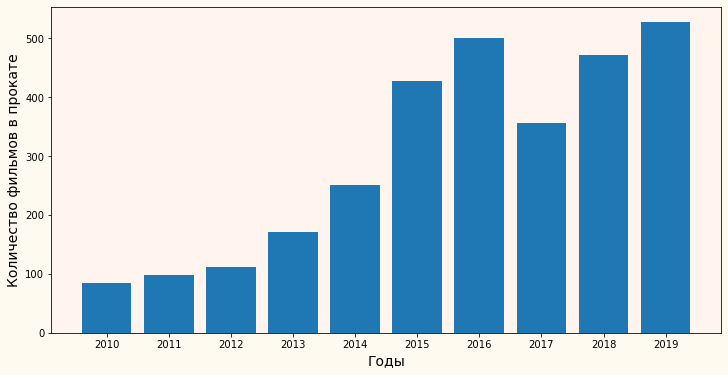

In [96]:
year_counts = df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
fig, ax = plt.subplots(1, 1, figsize = (12, 6));
ax.bar(x = np.sort(df['show_start_year'].unique()), height = year_counts['box_office'].values)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
ax.set_xlabel('Годы', fontsize=14)
ax.set_ylabel('Количество фильмов в прокате', fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show();


Количество фильмов в прокате стабильно росло с 2010 по 2016 годы, затем в 2017 их количество резко снизилось и до 2019 года снова начало расти.

In [97]:
(df[['show_start_year','box_office']].groupby('show_start_year').apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame()

,0
show_start_year,
2010,11.04
2011,20.63
2012,21.47
2013,28.98
2014,34.43
2015,64.75
2016,64.85
2017,71.34
2018,53.70


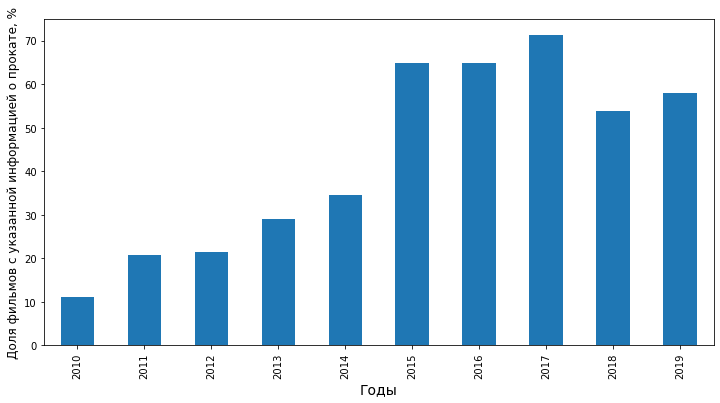

In [98]:
((df.groupby('show_start_year')['box_office'].count() / df.groupby('show_start_year')['show_start_year'].count()) * 100).plot(kind = 'bar', figsize = (12, 6));
plt.xlabel('Годы', fontsize =14)
plt.ylabel('Доля фильмов с указанной информацией о прокате, %', fontsize = 12)
plt.show();


Больше всего процент прокатных фильмов был с 2015 по 2017 годы.

Динамика проката по годам.

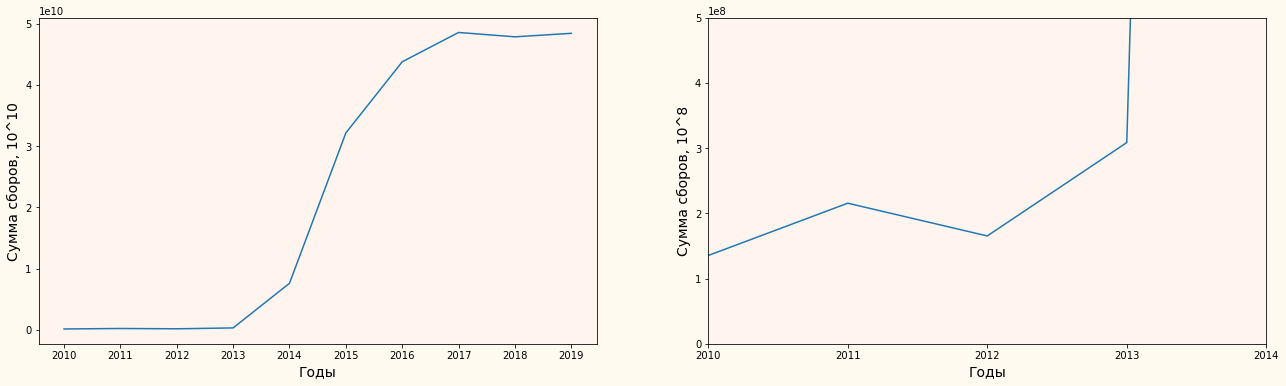

In [99]:
year_sums = df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 6));
ax1.plot(np.sort(df['show_start_year'].unique()), year_sums['box_office'].values);
ax1.set_facecolor('seashell');
fig1.set_facecolor('floralwhite');
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1));
ax1.set_xlabel('Годы', fontsize=14);
ax1.set_ylabel('Сумма сборов, 10^10', fontsize=14);


ax2.plot(np.sort(df['show_start_year'].unique()), year_sums['box_office'].values);
ax2.set_facecolor('seashell');
fig1.set_facecolor('floralwhite');
ax2.set_ylim([0, 0.05e10]);
ax2.set_xlim([2010, 2014]);
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1));
ax2.set_xlabel('Годы', fontsize=14);
ax2.set_ylabel('Сумма сборов, 10^8', fontsize=14);

plt.show();



In [100]:
year_sums

,box_office
show_start_year,
2010,"135,390,191.00"
2011,"215,541,591.00"
2012,"165,331,086.00"
2013,"308,509,511.20"
2014,"7,598,319,624.60"
2015,"32,159,642,790.37"
2016,"43,777,653,434.34"
2017,"48,569,446,366.51"
2018,"47,857,685,554.58"


С 2010 года сумма сборов немного росла, упав лишь в 2012 году. Затем, начиная с 2013 года, начался стремительный рост, который замедлился в 2017 году и остался на том же уровне вплоть до 2019 года.
По сводной таблице видно, что сумма сборов была минимальной в 2010 году, а максимальной - в 2017.

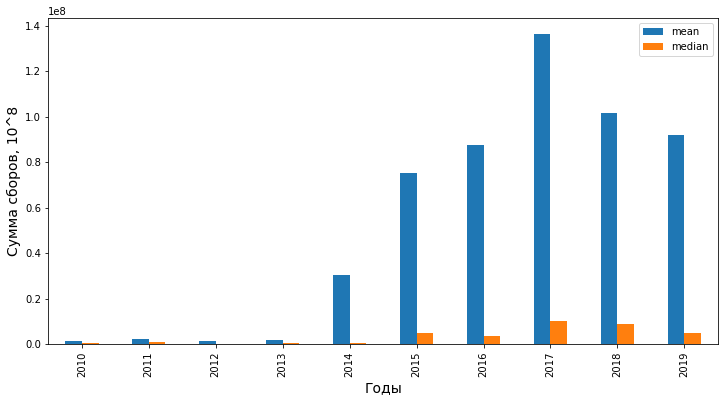

In [101]:
year_mean_median = df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
year_mean_median.plot.bar(y=['mean', 'median'], figsize=(12, 6), label = ['mean', 'median'])

plt.xlabel('Годы', fontsize=14); 
plt.ylabel('Сумма сборов, 10^8', fontsize=14); 
plt.show();


Из графика видно, что медиана за каждый год значительно меньше, чем среднее за тот же период.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

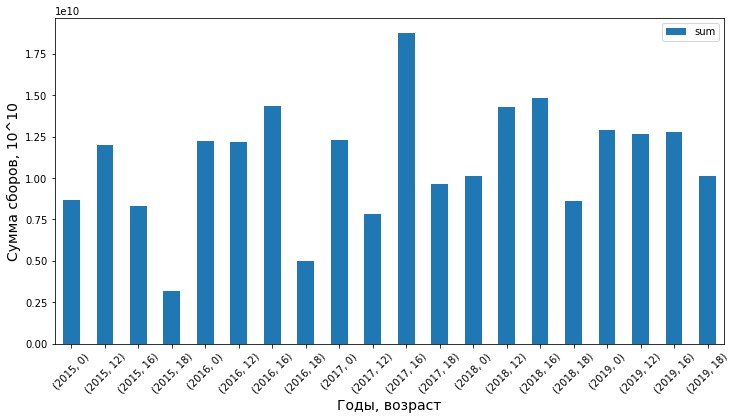

In [102]:
year_age = df.query('2015 <= show_start_year <= 2019').pivot_table(index = ['show_start_year', 'age_restriction'], values = ['box_office'], aggfunc = ['sum'])
year_age.plot.bar(y=['sum'], figsize=(12, 6), label = ['sum'], rot = 45)

plt.xlabel('Годы, возраст', fontsize=14); 
plt.ylabel('Сумма сборов, 10^10', fontsize=14); 


plt.show();



In [103]:
year_age

sum
                                       box_office
show_start_year age_restriction                  
2015            0                8,683,343,863.09
                12              11,984,333,443.41
                16               8,299,600,815.89
                18               3,192,364,667.98
2016            0               12,213,887,386.91
                12              12,193,342,033.01
                16              14,364,019,939.80
                18               5,006,404,074.62
2017            0               12,315,741,075.76
                12               7,859,319,760.67
                16              18,742,889,949.06
                18               9,651,495,581.02
2018            0               10,137,423,625.52
                12              14,267,291,660.69
                16              14,817,363,006.43
                18               8,635,607,261.94
2019            0               12,874,688,719.28
                12              12,684,185,380.67
                16              12,749,387,365.10
                18              10,121,796,303.64

В целом единой тенденции не наблюдается, но на графике можно увидеть, что сумма сборов для возрастного ограничения 16+ в основном больше за каждый год по отдельности и вместе, чем для остальных, кроме 2015 года, а фильмы 18+ почти всегда имеют наименьшие сборы. Также картина примерно одинаковая в каждом году, только в 2017 году был резкий всплеск суммы сборов для 16+. Вероятно это связано с падением количества вышедших фильмов в этом году и подорожанием билетов.

## Фильмы, которые получили государственную поддержку


In [104]:
df_support = df.loc[(~df['refundable_support'].isna()) & (df['production_country'].str.contains('Россия'))]
df_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support/budget
1165,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1316,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,6.60,Неизвестно,"28,140.00",2014,А.Якимчук,Неизвестно,0.70
1361,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1384,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1629,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"биография, драма, история","717,703,185.53",2019,А.Кравчук,биография,0.51
6771,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",0,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм, приключения, семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,0.53
6779,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"боевик, фантастика",NaN,2019,Ф.Бондарчук,боевик,0.53
6781,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65


Первая интересная закономерность - во всех фильмах с государственной поддержкой в столбце со страной-производителем есть Россия.

In [105]:
df_support['type'].value_counts()

Художественный    298
Анимационный       31
Документальный      1
Name: type, dtype: int64

90% фильмов с государственной поддержкой - художественные.

In [106]:
df_support['financing_source'].value_counts()

Министерство культуры               163
Фонд кино                           145
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Примерно половина фильмов получили средства от Министерства культуры, а половина - от Фонда кино.

In [107]:
df_support['main_genre'].value_counts()

комедия        96
драма          85
боевик         26
военный        22
Неизвестно     16
детектив       14
мультфильм     11
биография      11
детский         9
триллер         7
мелодрама       7
приключения     6
ужасы           5
криминал        4
фантастика      3
история         2
семейный        2
вестерн         1
реальное ТВ     1
фэнтези         1
мюзикл          1
Name: main_genre, dtype: int64

Более половины средств выделялись на комедии и драмы.

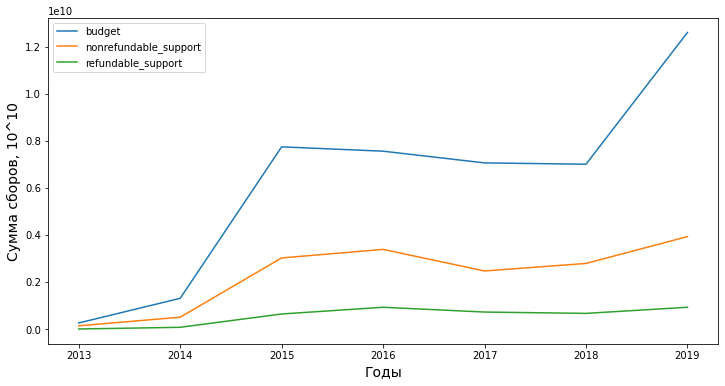

In [108]:
support_stat = df_support.pivot_table(index = ['show_start_year'], values = ['refundable_support', 'nonrefundable_support', 'budget'], aggfunc = ['sum'])
support_stat.plot(figsize = (12, 6))
plt.legend(['budget', 'nonrefundable_support', 'refundable_support'])


plt.xlabel('Годы', fontsize=14); 
plt.ylabel('Сумма сборов, 10^10', fontsize=14); 
plt.show();

Видно, что объем невозвратных средств поддержки больше, чем возвратных. Также можно заметить резкое увеличение всех 3 значений в 2015 и 2018 годах. 

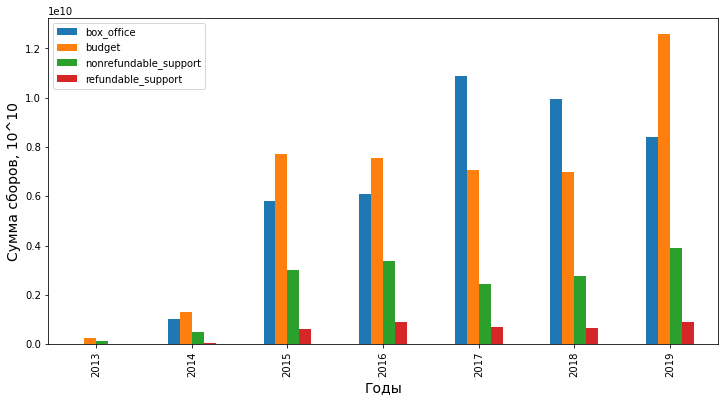

In [109]:
support_payback = df_support.pivot_table(index = ['show_start_year'], values = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office'], aggfunc = ['sum'])

support_payback.plot(kind = 'bar', figsize = (12, 6))
plt.legend(['box_office','budget', 'nonrefundable_support', 'refundable_support'])
plt.xlabel('Годы', fontsize=14); 
plt.ylabel('Сумма сборов, 10^10', fontsize=14); 
plt.show();


На графике четко видно, что фильмы окупались только в 2017 - 2018 годах. Поэтому фильмы с государственной поддержкой окупаются плохо.

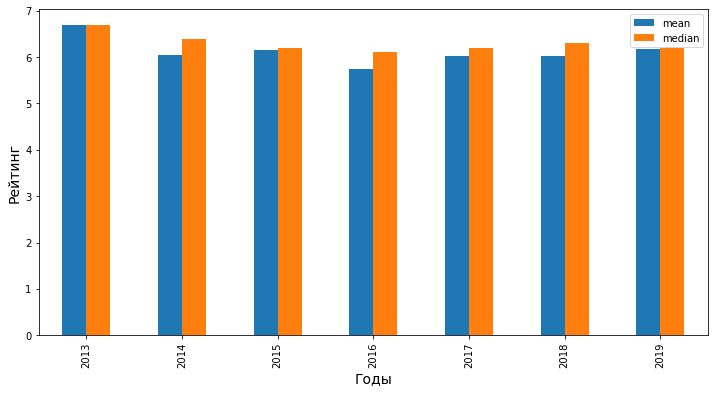

In [110]:
support_ratings = df_support.pivot_table(index = ['show_start_year'], values = ['ratings'], aggfunc = ['mean', 'median'])


support_ratings.plot(kind = 'bar', figsize = (12, 6))
plt.legend(['mean', 'median'])
plt.xlabel('Годы', fontsize=14); 
plt.ylabel('Рейтинг', fontsize=14); 
plt.show();

Видно, что медианная оценка чуть выше средней почти, также видно, что все оценки находятся в диапазое 6 - 7 баллов. 

## Вывод

- В таблице изначально было много неправильных типов данных, требующих изменений
- Также много пропусков в категориальных и количественных значениях
- Были удалены почти 10% дубликатов
- Исаправлены многие повтрояющиеся значения и добавлены новые столбцы
- Можно выделить, что в 2017 резко упало количество прокатных фильмов, что, вероятно, привело к подорожанию билетов и увеличению суммы сбора в этом году
- Сумма сборов активно росла с 2013 по 2017 годы, затем рост замедлился
- Больше всего сборов за картины с возрастным ограничением 16+, меньше всего - за 18+
- Обьем возвратных средств поддержки значительно меньше невозвратных
- Но даже многомиллионные средства государственной поддержки смогли вывести фильмы на окупаемость только в 2017 и 2018 годах
- Средние оценки таких фильмов не превышают 7 баллов